## Loan Customer Prediction

The company seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. It is expected that the data scientist  development a Machine larning model that will help the company predict loan approval in accelerating the decision-making process to determine whether an applicant is either qhalify for a loan or not.

### Overview

This notebook presents a comprehensive workflow for analyzing and modeling a loan prediction dataset. The process includes the following key steps:

 **Data Loading and Exploration**: The dataset is loaded and initial exploratory data analysis (EDA) is performed to understand the structure, data types, and missing values.

 **Data Cleaning and Preprocessing**: Missing values are handled, categorical variables are encoded using label encoding, and unnecessary columns are dropped. Duplicate entries are checked and descriptive statistics are generated.

**Exploratory Data Analysis (EDA)**: Visualizations such as boxplots, countplots, scatterplots, and heatmaps are used to explore the distribution of features and relationships between variables.

 **Feature Engineering**: Categorical variables are converted to numerical values to prepare the data for machine learning models.

**Model Training and Evaluation (Classification)**: Multiple classification algorithms are trained to predict loan approval status, including Logistic Regression, Decision Tree, Random Forest, SVM, XGBoost, CatBoost, and AdaBoost. Model performance is evaluated using accuracy, precision, recall, and F1 score.

 **Model Comparison**: The performance of each classification model is compared using F1 scores for both training and test sets, visualized with bar plots.

**Best Model Selection**: CatBoostClassifier is identified as the best-performing model for loan approval prediction based on evaluation metrics.

 **Regression Modeling**: The notebook also predicts loan amounts using XGBoostRegressor, including hyperparameter tuning with GridSearchCV. Model performance is assessed using MAE, RMSE, and R² metrics.

 **Prediction and Submission**: The predicted loan amounts are compared to actual values, visualized, and prepared for submission in a CSV file.




Import python librarie

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

Ignore waring

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
#load the dataset
data = pd.read_csv("train.csv")
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
df = data.copy()

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#% of missing values per column
df.isnull().sum()/len(df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [8]:
#Count the number of duplicates in the dataset
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Data transformation

Replacen unwanted values in the below column

In [10]:
#All the nan value will be replace with 0
df['Gender']=df['Gender'].replace(np.nan,'Male')
df['Credit_History']=df['Credit_History'].replace(np.nan,'0')

df['Dependents']=df['Dependents'].replace(np.nan,'0')
df['Dependents']=df['Dependents'].replace('3+' , '3')


To count the number of nulls in each column i use an aggregate function to calculate the parcentages of null value per each column

In [11]:
for col in df.describe(include='object').columns:
    #print(col)
    print(df[col].value_counts(normalize=True)*100)
    print('-'*30)

Gender
Male      81.758958
Female    18.241042
Name: proportion, dtype: float64
------------------------------
Married
Yes    65.139116
No     34.860884
Name: proportion, dtype: float64
------------------------------
Dependents
0    58.631922
1    16.612378
2    16.449511
3     8.306189
Name: proportion, dtype: float64
------------------------------
Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64
------------------------------
Self_Employed
No     85.910653
Yes    14.089347
Name: proportion, dtype: float64
------------------------------
Credit_History
1.0    77.361564
0.0    14.495114
0       8.143322
Name: proportion, dtype: float64
------------------------------
Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: proportion, dtype: float64
------------------------------
Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64
------------------------------


Removed null values

In [12]:
df.dropna(inplace= True)

### Exploratory Data analyst(EDA)

<Axes: xlabel='Loan_range'>

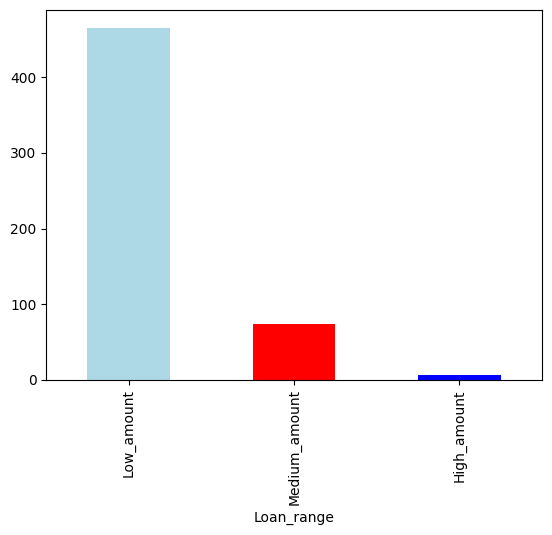

In [13]:
df['Loan_range'] = df['LoanAmount'].apply(lambda x : "Low_amount" if x < 200 
                                                     else ("Medium_amount" if 200 <= x < 500
                                                           else "High_amount"))

df['Loan_range'].value_counts().plot.bar(color=['lightblue', 'red', 'blue'])

Visualize the distribution of all numerical column

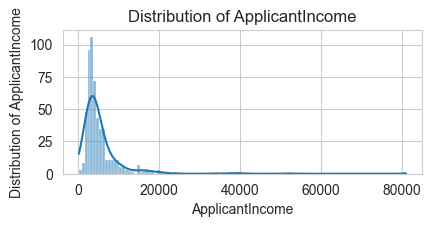

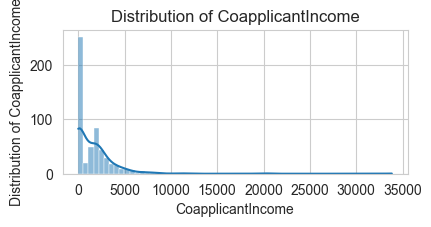

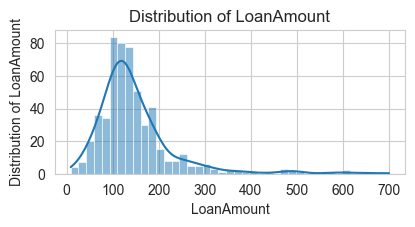

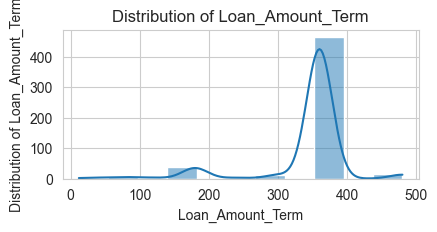

In [14]:
numerical = df.dtypes[df.dtypes != 'object'].index.tolist()
categorical = df.dtypes[df.dtypes == 'object'].index.tolist()

sns.set_style("whitegrid")

# Loop through categorical features for countplot visualization
for i, column in enumerate(numerical, start=1):  # Use enumerate to get the index
    plt.figure(figsize=(12, 8))
    plt.subplot(4, 3, i)  # Corrected: add missing comma between 3 and i
    sns.histplot(x=df[column], kde=True, palette='rocket_r')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

Count values in the categorical column

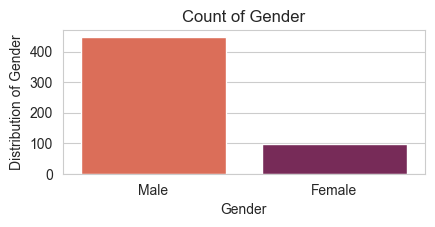

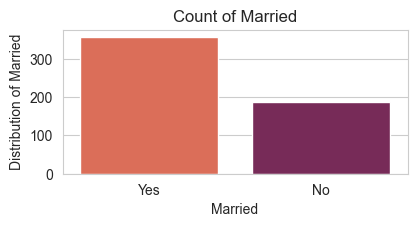

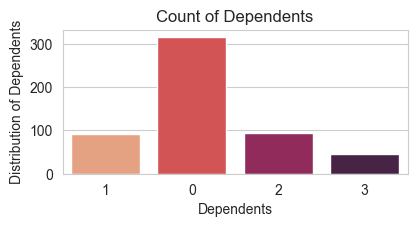

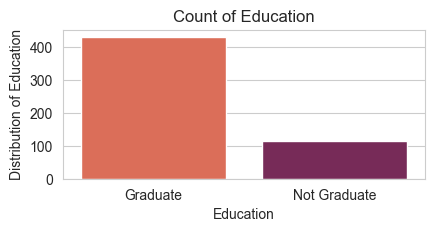

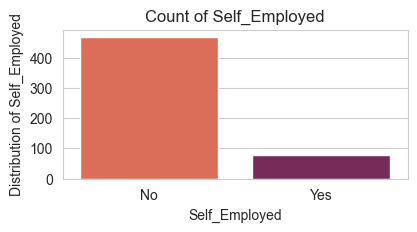

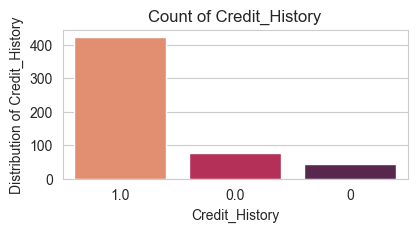

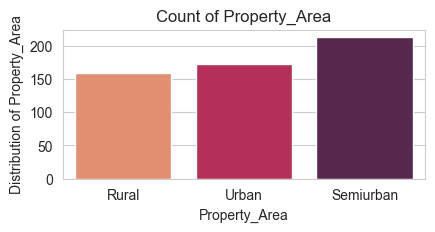

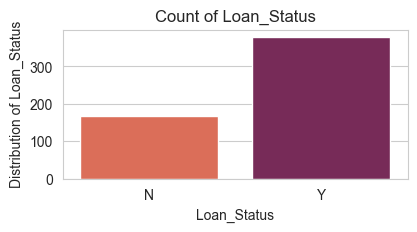

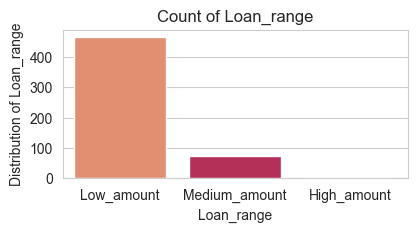

In [15]:
sns.set_style("whitegrid")

# Loop through categorical features for countplot visualization
for i, column in enumerate(categorical, start=1):  # Use enumerate to get the index
    plt.figure(figsize=(12, 8))
    plt.subplot(4, 3, i)  # Corrected: add missing comma between 3 and i
    sns.countplot(x=df[column], palette='rocket_r')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

Removed the outliers in the numerical column

In [16]:
#remove the oulier, from 0.01 to 0.95 parcent
outliers =['CoapplicantIncome','Loan_Amount_Term', 'ApplicantIncome', 'LoanAmount']

for c in outliers:
    Q1=df[c].quantile(0.01)
    Q3=df[c].quantile(0.95)
    df=df[df[c]<=Q3]
    df=df[df[c]>=Q1]

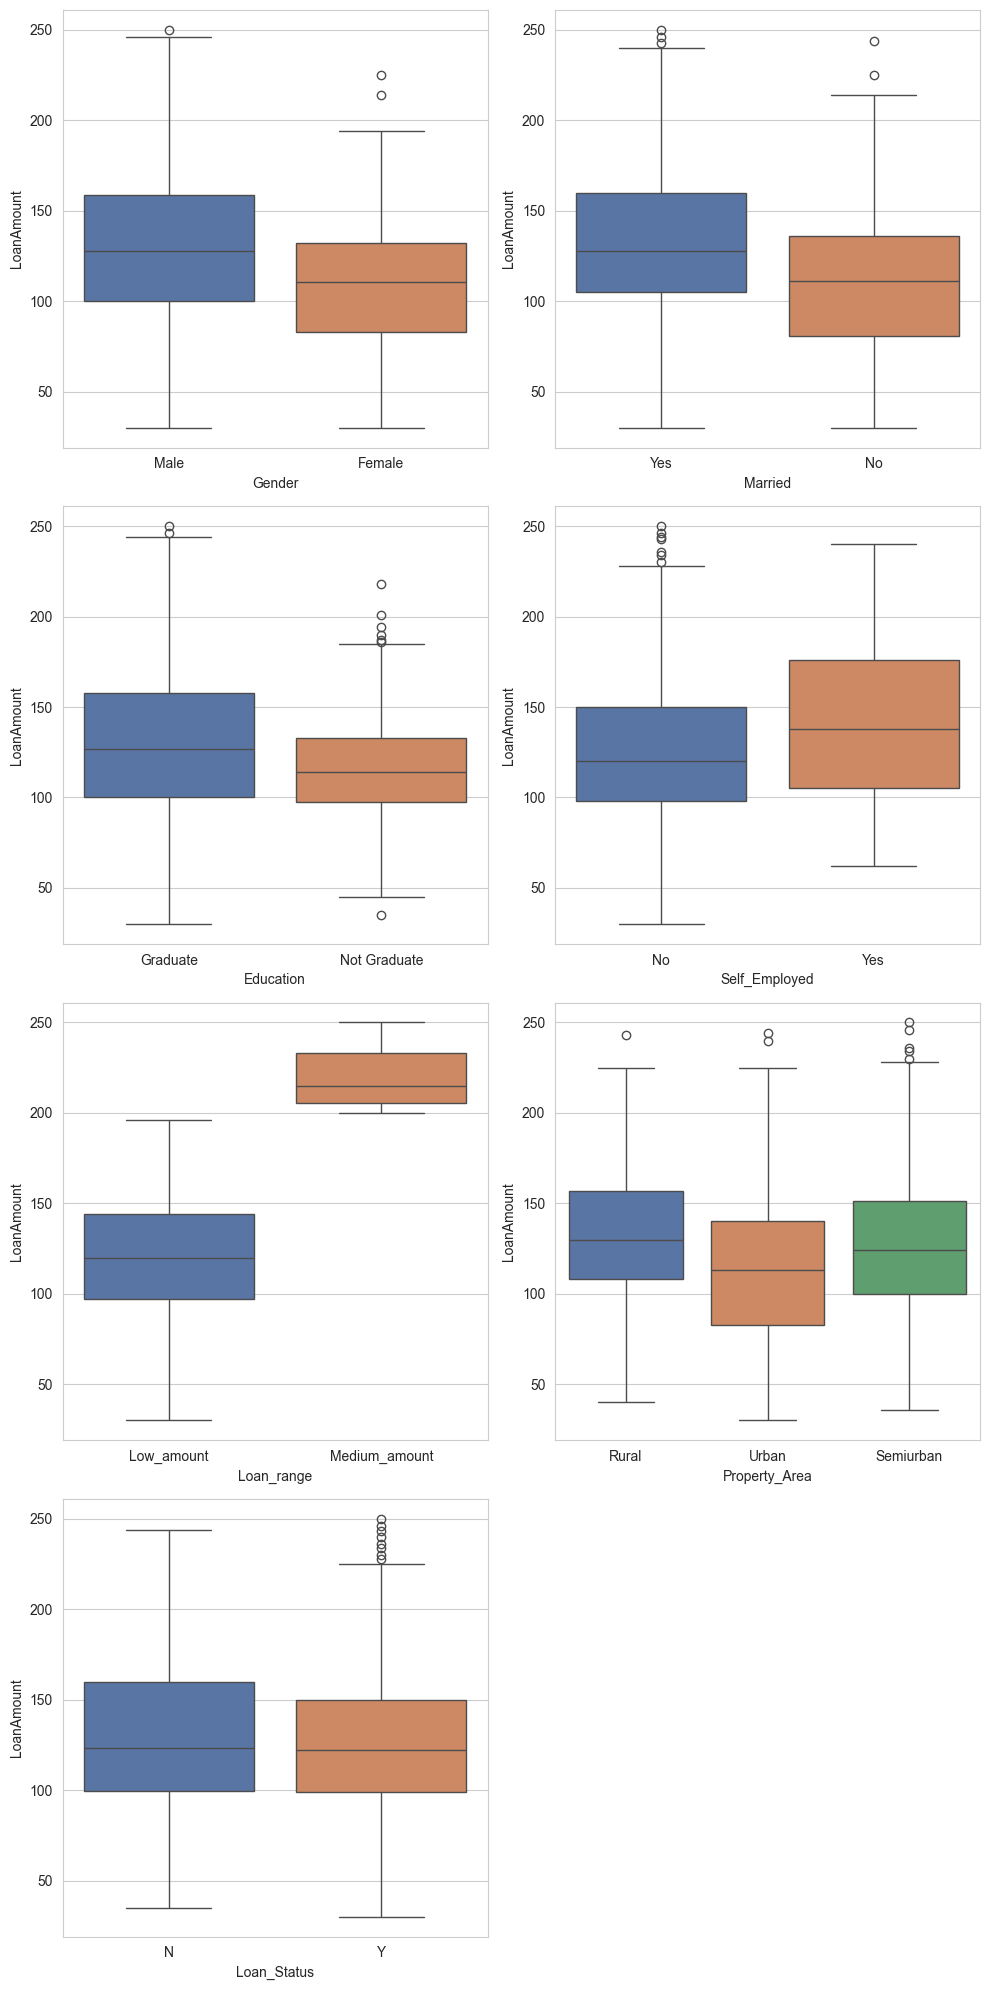

In [17]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'Gender', y = 'LoanAmount', palette="deep", data = df)
plt.subplot(4,2,2)
sns.boxplot(x = 'Married', y = 'LoanAmount', palette="deep", data = df)
plt.subplot(4,2,3)
sns.boxplot(x = 'Education', y = 'LoanAmount', palette="deep", data = df)
plt.subplot(4,2,4)
sns.boxplot(x = 'Self_Employed', y = 'LoanAmount', palette="deep", data = df)
plt.subplot(4,2,5)
sns.boxplot(x = 'Loan_range', y = 'LoanAmount', palette="deep", data = df)
plt.subplot(4,2,6)
sns.boxplot(x = 'Property_Area', y = 'LoanAmount', palette="deep", data = df)
plt.subplot(4,2,7)
sns.boxplot(x = 'Loan_Status', y = 'LoanAmount', palette="deep", data = df)
plt.tight_layout()
plt.show()

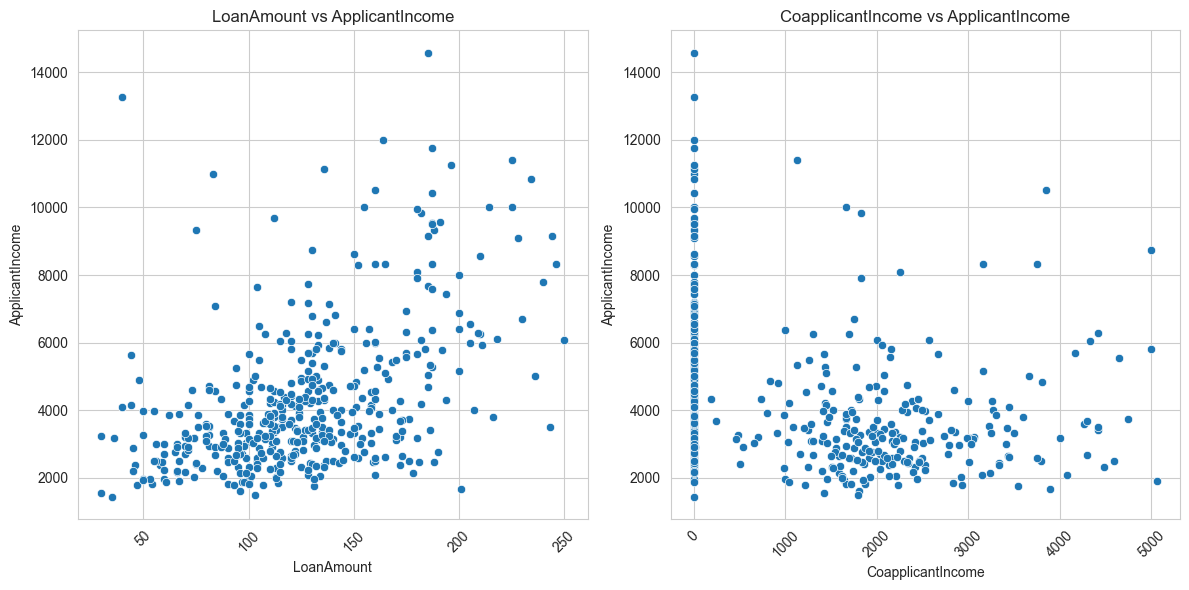

In [18]:
numeric_features = ['LoanAmount', 'CoapplicantIncome']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(12, 6))

for i, c in enumerate(numeric_features):
    sns.scatterplot(x=df[c], y=df['ApplicantIncome'], ax=axes[i])
    axes[i].set_title(f"{c} vs ApplicantIncome")
    axes[i].set_xlabel(c)
    axes[i].set_ylabel('ApplicantIncome')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Normalize the numerical column

In [19]:
df['CoapplicantIncome']=np.log1p(df['CoapplicantIncome'])
df['ApplicantIncome']=np.log1p(df['ApplicantIncome'])
#df['LoanAmount']=np.log1p(df['LoanAmount'])
df['Loan_Amount_Term']=np.log1p(df['Loan_Amount_Term'])

### Visualize after normalization

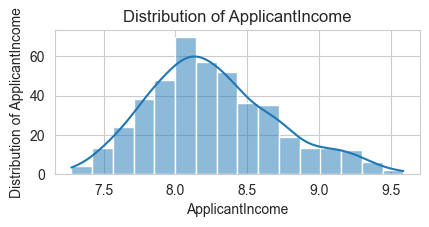

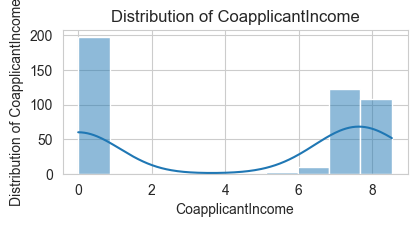

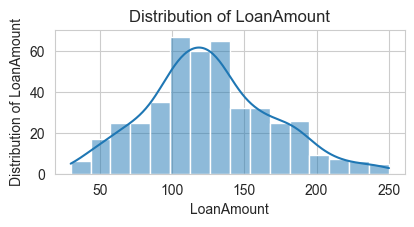

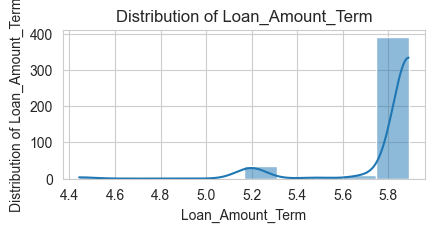

In [20]:
sns.set_style("whitegrid")

# Loop through categorical features for countplot visualization
for i, column in enumerate(numerical, start=1):  # Use enumerate to get the index
    plt.figure(figsize=(12, 8))
    plt.subplot(4, 3, i)  # Corrected: add missing comma between 3 and i
    sns.histplot(x=df[column], kde=True, palette='rocket_r')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

**Heatmap** is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values

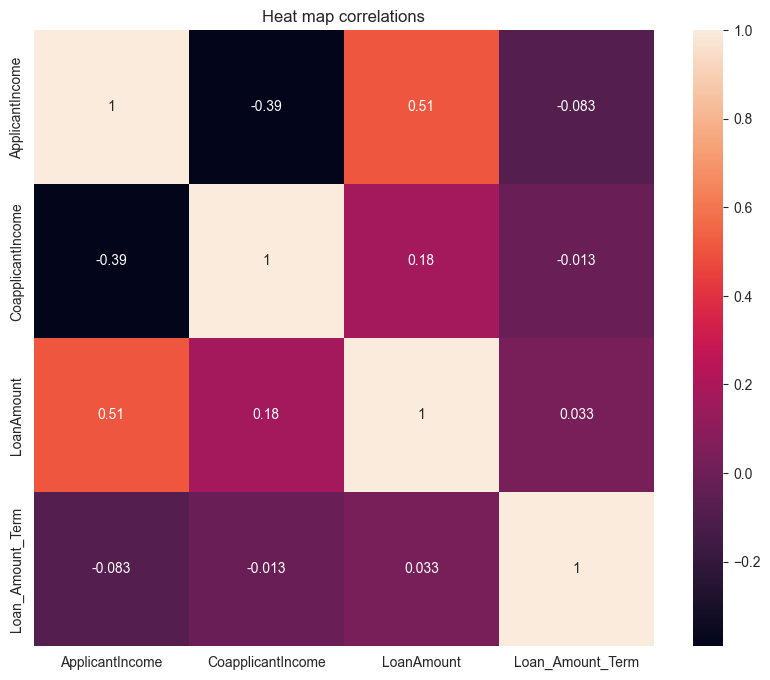

In [21]:
#select only the numeric columns in the DataFrame
df1 = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True)
plt.title("Heat map correlations")
plt.show()

## __Feature engeneering__
### Convert categorical variables to numerical using one-hot encoding     


In [22]:
#pip install catboost

In [23]:
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder

In [24]:
categorical_features = df.select_dtypes(exclude=np.number)

Le = LabelEncoder()

for column in categorical_features:
    df[column] = Le.fit_transform(df[column].astype(str))


In [25]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_range
1,1,1,1,0,0,8.430327,7.319202,128.0,5.888878,2,0,0,0
2,1,1,0,0,1,8.006701,0.000000,66.0,5.888878,2,2,1,0


In [26]:
X =  df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

X_test.shape, X_train.shape

((133, 12), (309, 12))

In [27]:
corr_matrix = df.corr()
corr_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.267247
Married              0.091827
CoapplicantIncome    0.073244
Property_Area        0.069358
Gender               0.052119
Loan_Amount_Term     0.023568
Dependents           0.016315
ApplicantIncome     -0.010101
Loan_range          -0.011249
LoanAmount          -0.032063
Self_Employed       -0.068460
Education           -0.095680
Name: Loan_Status, dtype: float64

In [28]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision, recall, f1, _ = precision_recall_fscore_support(true, predicted, average='weighted')
    return accuracy, precision, recall, f1

In [29]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

model_list = []
accuracy_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_precision, model_train_recall, model_train_f1 = evaluate_model(y_train, y_train_pred)
    model_test_accuracy, model_test_precision, model_test_recall, model_test_f1 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1))

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.6796
- Precision: 0.6185
- Recall: 0.6796
- F1 Score: 0.6232
----------------------------------
Model performance for Test set
- Accuracy: 0.7218
- Precision: 0.6638
- Recall: 0.7218
- F1 Score: 0.6683


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7594
- Precision: 0.7688
- Recall: 0.7594
- F1 Score: 0.7634


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8195
- Precision: 0.8103
- Recall: 0.8195
- F1 Score: 0.8089


Support Vector Machine
Model performance for Training set
- Accuracy: 0.7023
- Precision: 0.4932
- Recall: 0.7023
- F1 Score: 0.5794
----------------------------------
Model performa

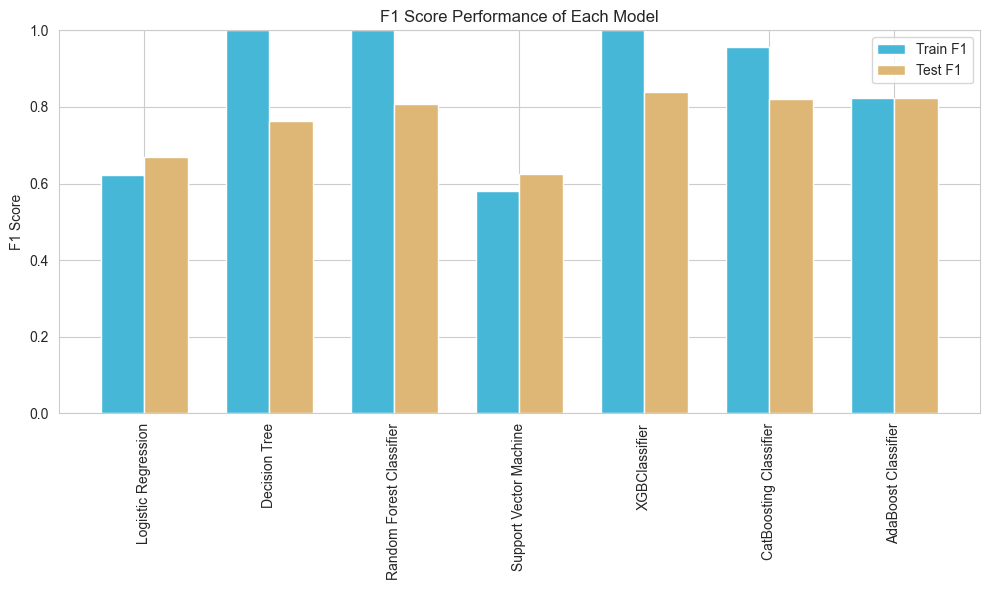

In [30]:
# Collect F1 scores for each model from previous training loop
# model_list and their corresponding F1 scores for train and test sets

# To get the F1 scores, you can re-run the evaluation for each model if not already stored
# Here, we assume model_list contains the model names in order, and you can access their F1 scores

# For demonstration, let's collect the F1 scores from the previous evaluation loop
# If you have stored them, use those lists directly

train_f1_scores = []
test_f1_scores = []

for model_name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    _, _, _, train_f1 = evaluate_model(y_train, y_train_pred)
    _, _, _, test_f1 = evaluate_model(y_test, y_test_pred)
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

x = np.arange(len(model_list))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, train_f1_scores, width, label='Train F1', color='#46b7d6')
plt.bar(x + width/2, test_f1_scores, width, label='Test F1', color='#deb675')
plt.xticks(x, model_list, rotation=90)
plt.ylabel('F1 Score')
plt.title('F1 Score Performance of Each Model')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

#### Catbooster Model with a better evaluation selected

In [31]:
# Initialize and train the catboost model with regularization
cat_boost = CatBoostClassifier(verbose=False)
cat_boost.fit(X_train, y_train)

# Predict on training and test data
y_train_pred_svm_reg = cat_boost.predict(X_train)
y_test_pred_svm_reg = cat_boost.predict(X_test)

# Evaluate performance on training data
model_train_accuracy_svm_reg, model_train_precision_svm_reg, model_train_recall_svm_reg, model_train_f1_svm_reg = evaluate_model(y_train, y_train_pred_svm_reg)

# Evaluate performance on test data
model_test_accuracy_svm_reg, model_test_precision_svm_reg, model_test_recall_svm_reg, model_test_f1_svm_reg = evaluate_model(y_test, y_test_pred_svm_reg)

# Print performance metrics for training data
print("Regularized cat_boost Model performance on training set:")
print(f"Accuracy: {model_train_accuracy_svm_reg}")
print(f"Precision: {model_train_precision_svm_reg}")
print(f"Recall: {model_train_recall_svm_reg}")
print(f"F1 Score: {model_train_f1_svm_reg}")
print("===================================")

# Print performance metrics for test data
print("Regularized cat_boost Model performance on test set:")
print(f"Accuracy: {model_test_accuracy_svm_reg}")
print(f"Precision: {model_test_precision_svm_reg}")
print(f"Recall: {model_test_recall_svm_reg}")
print(f"F1 Score: {model_test_f1_svm_reg}")

Regularized cat_boost Model performance on training set:
Accuracy: 0.9579288025889967
Precision: 0.9593629284766513
Recall: 0.9579288025889967
F1 Score: 0.9571112600634805
Regularized cat_boost Model performance on test set:
Accuracy: 0.8345864661654135
Precision: 0.831453634085213
Recall: 0.8345864661654135
F1 Score: 0.8194235588972432


### Plot the metric performance result 

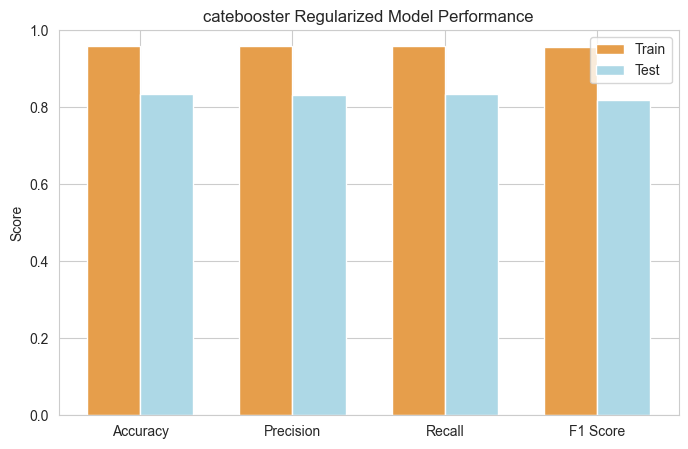

In [32]:
import matplotlib.pyplot as plt

# Metrics for SVM with regularization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_scores = [
    model_train_accuracy_svm_reg,
    model_train_precision_svm_reg,
    model_train_recall_svm_reg,
    model_train_f1_svm_reg
]
test_scores = [
    model_test_accuracy_svm_reg,
    model_test_precision_svm_reg,
    model_test_recall_svm_reg,
    model_test_f1_svm_reg
]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_scores, width, label='Train', color='#e69e4b')
plt.bar(x + width/2, test_scores, width, label='Test', color='lightblue')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('catebooster Regularized Model Performance')
plt.legend()
plt.show()

Submited loan statement of each customer per ID

In [33]:
X_test['Loan_ID'] = data['Loan_ID']
X_test['status_predict'] = y_test_pred_svm_reg    
X_test[['Loan_ID', 'status_predict']].to_csv('submission_status.csv', index=False)

Let's Predict the loan amount after the model training from loan status which indecate if the customer is eligible for the loan or not.

In [34]:
X =  df.drop(['LoanAmount'], axis=1)
y = df['LoanAmount']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.30,random_state=0)

In [35]:
X_train.shape, y_train.shape

((309, 12), (309,))

In [36]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


In [37]:
y_train[:5]

323    132.0
314    159.0
353    105.0
355    116.0
583     61.0
Name: LoanAmount, dtype: float64

Import XGBRegressor libreries

In [38]:
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error



In [39]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [40]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define the model
xgb_base = XGBRegressor(objective='reg:squarederror')

# Parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'n_estimators': [100, 200, 500]
}

# Grid search
grid_search = GridSearchCV(estimator=xgb_base, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', 
                           verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best estimator prediction
y_pred_xgb = grid_search.predict(X_val)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

print("Best MAE: ", mae_xgb)
print("Best Parameters: ", grid_search.best_params_)


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best MAE:  21.65755181563528
Best Parameters:  {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 500, 'subsample': 0.5}


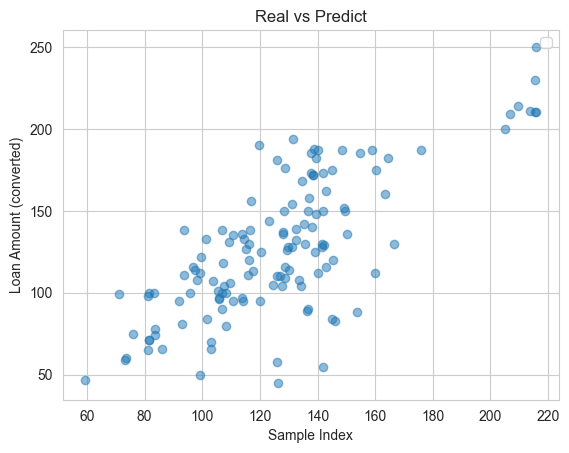

In [41]:
# Plot Real vs Predict (corrected for matching lengths)
#plt.scatter(np.arange(len(y_val)), y_val * 0.092903, color='blue', label='Real', alpha=0.5)
plt.scatter(x =y_pred_xgb, y= y_val, alpha=0.5)
plt.title("Real vs Predict")
plt.xlabel("Sample Index")
plt.ylabel("Loan Amount (converted)")
plt.legend(loc='best')
plt.show()


## Evaluate model prediction

Train R2 Score:  0.7230719031377104
Test R2 Score:  0.5583335154027478
Train RMSE:  22.739816834665774
Test RMSE:  28.074420829365806


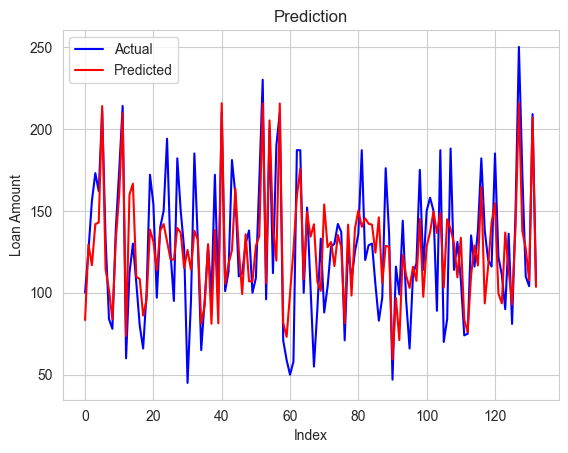

In [42]:
# Predictions
train_predict = grid_search.predict(X_train)
test_predict = grid_search.predict(X_val)

# Evaluate the model
train_rmse = np.sqrt(np.mean((train_predict - y_train) ** 2))
test_rmse = np.sqrt(np.mean((test_predict - y_val) ** 2))
r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_val, test_predict)

print("Train R2 Score: ", r2_train)
print("Test R2 Score: ", r2_test)   
print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

# Visualize the predictions
plt.plot(y_val.values, color='blue', label='Actual')
plt.plot(test_predict, color='red', label='Predicted')
plt.title('Prediction')
plt.xlabel('Index')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()


#### Submited csv file

In [43]:
X_val['Loan_ID'] = data['Loan_ID']
X_val['LoanAmount'] = y_pred_xgb    
X_val[['Loan_ID', 'LoanAmount']].to_csv('submission.csv', index=False)

## Summary

In this notebook, we performed a comprehensive analysis and modeling of a loan prediction dataset. The workflow included data cleaning, exploratory data analysis, feature engineering (including label encoding of categorical variables), and handling missing values. We trained and evaluated several classification models (Logistic Regression, Decision Tree, Random Forest, SVM, XGBoost, CatBoost, AdaBoost) to predict loan approval status, and regression models (XGBoost Regressor) to predict loan amounts. Model performance was assessed using metrics such as accuracy, precision, recall, F1 score for classification, and MAE, RMSE, R² for regression.

## Conclusion

Among the classification models, CatBoostClassifier and XGBoostClassifier provided the best performance, with CatBoost showing slightly better generalization on the test set. For loan amount prediction, the XGBoostRegressor achieved a reasonable R² score and low RMSE, indicating good predictive power, though there is still room for improvement. The data preprocessing steps, including handling missing values and encoding, were crucial for achieving these results.

## Recommendation

- **Model Deployment:** CatBoostClassifier is recommended for deployment for loan approval prediction due to its strong performance and robustness to categorical features.
- **Feature Engineering:** Further feature engineering, such as interaction terms or domain-specific features, may improve model performance.
- **Hyperparameter Tuning:** More extensive hyperparameter optimization (e.g., using Bayesian optimization) could yield better results for both classification and regression tasks.
- **Data Quality:** Collecting more data and reducing missing values will likely improve model accuracy and generalizability.
- **Explainability:** Consider using model explainability tools (e.g., SHAP) to interpret model predictions and build trust with stakeholders.